In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
import fastf1
from src.plotset import setup_plot
from fastf1 import plotting

setup_plot()

Matplotlib rcParams initialized with custom style.


In [2]:
fastf1.Cache.enable_cache('./f1_cache')
fastf1.Cache.get_cache_info()

('./f1_cache', 2244982380)

In [3]:
team_names = ['McLaren', 'Ferrari', 'Mercedes', 'Red Bull Racing', 'Williams',
              'Kick Sauber', 'Racing Bulls', 'Aston Martin', 'Haas F1 Team', 'Alpine']

In [4]:
def mean_pit_time(session,team_names=team_names):
    pit_times = []
    for team in team_names:
        df = pd.DataFrame(session.laps.pick_teams(team))
        df['PitTotalTime'] = df.PitOutTime.shift(-1) - df.PitInTime
        df['PitTotalTime'] = df['PitTotalTime'].dt.total_seconds()
        pit_times.append(round(df.PitTotalTime.mean(),3))
    return pit_times

In [5]:
pit_perf = {}
for i in range(1,13):
    race = fastf1.get_session(2025,i,'R')
    race.load(laps=True,telemetry=False,weather=False,messages=False)
    if i == 12:
        pit_perf[i] = np.float64(28.991)
    else:
        pit_perf[i] = mean_pit_time(race)

core           INFO 	Loading data for Australian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '87'
core        WARNING 	Fixed incorrect tyre stint information for driver '30'
core        WARNING 	Fixed incorrect tyre stint information for driver '5'
core        WARNING 	Driver 4 completed the race distance 00:00.022000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '63', '12', '23', '18', '27', '16', '81', '44', '10', '22

In [6]:
pits_df = pd.DataFrame(pit_perf).T
team_names = ['McLaren', 'Ferrari', 'Mercedes', 'RedBull\nRacing', 'Williams',
              'Kick\nSauber', 'Racing\nBulls', 'Aston\nMartin', 'Haas\nF1 Team', 'Alpine']
pits_df.columns = team_names

In [7]:
rel_pits_df = round(pits_df.div(pits_df.min(axis=1),axis=0),3)

In [8]:
driver_names = ['NOR','LEC','RUS','VER','ALB',
                'HUL','LAW','ALO','OCO','GAS']

In [9]:
driver_palette = plotting.get_driver_color_mapping(session=race)
team_palette = {}
for i,j in zip(team_names,driver_names):
    team_palette[i] = driver_palette[j]

req            INFO 	Using cached data for driver_info


In [10]:
rel_pits_df.columns = team_names

In [47]:
scores_df = 0.8*rel_pits_df.median() + 0.2*(rel_pits_df.quantile(0.75) - rel_pits_df.quantile(0.25))
scores_df.sort_values(inplace=True)

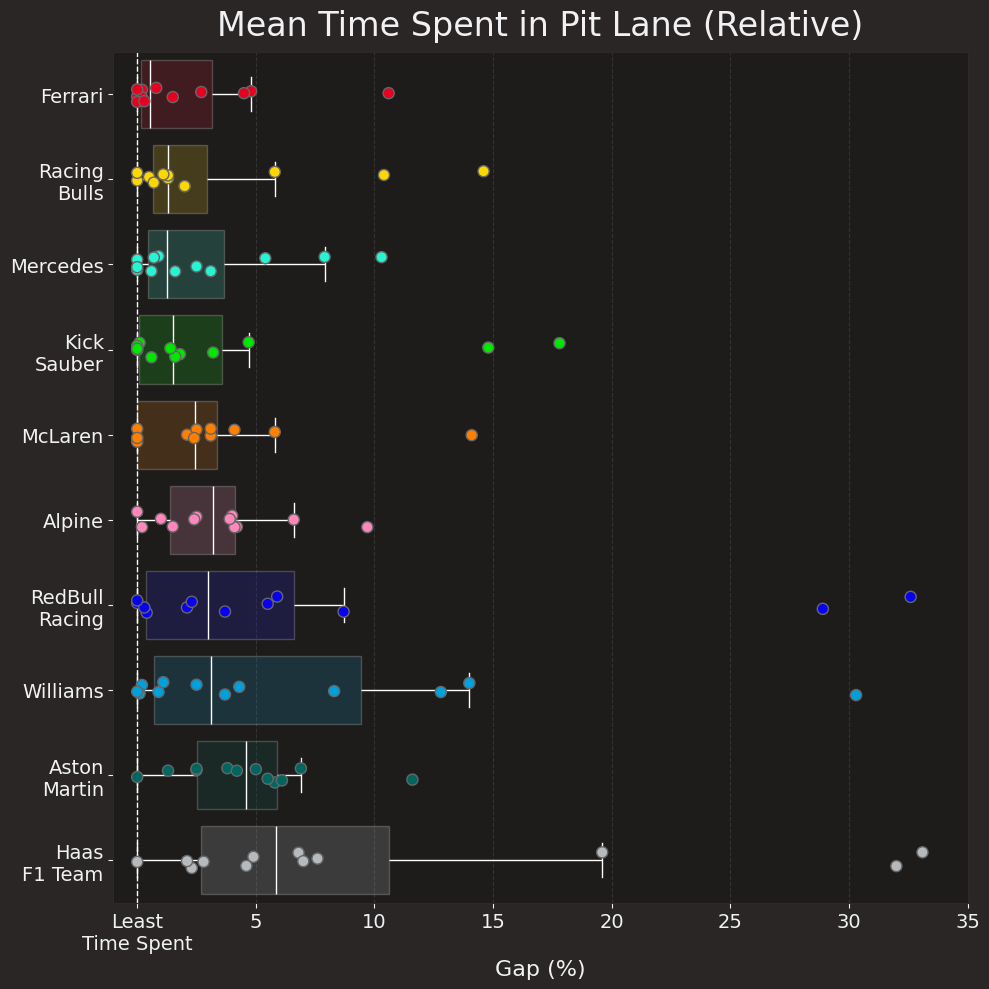

In [65]:
fig,ax = plt.subplots(figsize=(10,10))

sns.boxplot(data=rel_pits_df,orient='h',width=0.8,linecolor='w',linewidth=1,fliersize=0,
            order=scores_df.index,palette=team_palette,ax=ax,boxprops=dict(alpha=0.2))
sns.stripplot(data=rel_pits_df,orient='h',linewidth=1,size=8,edgecolor='#666666',
              order=scores_df.index,palette=team_palette,ax=ax)

ax.set_xlim(left=0.99,right=1.35)
ax.set_xlabel('Gap (%)')
ax.set_xticks([i/100 for i in range(100,140,5)])
ax.set_xticklabels(['Least\nTime Spent']+[str(i) for i in range(5,40,5)])
ax.set_title('Mean Time Spent in Pit Lane (Relative)')
ax.axvline(1.0, color='white', linestyle='--', linewidth=1)
ax.grid(axis='x', linestyle='--')

plt.show()